In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

from scipy.special import gamma
from tabulate import tabulate
from time import time

### Values for reference

In [2]:
european_call_ref = 0.056832
variance_swap_price_ref = 0.028295
variance_call_price_ref = 0.013517

### Kernel function

In [3]:
def K_t(t):
    if t == 0:
        return 0
    
    return t**(H-0.5)/gamma(H+0.5) #check

In [4]:
M = 10**2
n = 10

l = 0.3
nu = 0.3
theta = 0.02
rho = -0.7
H = 0.1

K = 1

V_0 = 0.02
S_0 = 1
Y_0 = np.log(S_0)

In [5]:
n_check_array = [2*k for k in range(2,25)]

In [203]:
t_0 = 0
T = 1

In [204]:
def european_call_options(x):
    return np.maximum(x-K,0)

def asian_options(x):
    A_T = T*np.mean(x)
    
    return np.maximum(A_T-K,0)

def lookback_options(x):
    M_T = np.max(x)
    
    return np.maximum(M_T-K,0)

def variance_swap_price(x):
    return x

def variance_call_price(x):
    return np.maximum(x-V_0,0)

In [205]:
#t_delta = T/n
#t = [k*t_delta for k in range(n)]
#
#K_t_delta = np.zeros((n,n))
#for k in range(n):
#    for i in range(k):
#        K_t_delta[k,i] = K_t(t[k]-t[i])

In [206]:
def test_scheme_for_fixed_n(process, f, n=5):
    S_n_M = np.zeros(M)

    for m in range(M):
        S_n_m = process(n)[1]
        S_n_M[m] = S_n_m[-1]

    U_M = np.mean(f(S_n_M))
    var_M = np.var(f(S_n_M))

    error = 2*var_M/np.sqrt(M)
    confidence_interval = [U_M - error, U_M + error]

    print("E =", U_M)
    print("Var =", var_M)
    print(confidence_interval)

    U_M_n = np.zeros(n)
        
    for i in range(n):
        S_n_M = np.zeros(M)

        for m in range(M):
            S_n_m = process(n)[1]
            S_n_M[m] = S_n_m[-1]

        U_M = np.mean(f(S_n_M))
        U_M_n[i] = U_M

    integers1toM = np.arange(1,M+1)
    cum_sum = np.cumsum(f(S_n_M))/integers1toM

    plt.plot(integers1toM, cum_sum, color="b")
    
    plt.xlabel("M")
    plt.ylabel("Expectation")
    
    plt.show()
    
    return S_n_M

In [207]:
def test_scheme_for_all_n(process, f, n=5):
    U_M_n = np.zeros(n)
        
    for i in range(n):
        S_n_M = np.zeros(M)

        for m in range(M):
            S_n_m = process(n)[1]
            S_n_M[m] = S_n_m[-1]

        U_M = np.mean(f(S_n_M))
        U_M_n[i] = U_M

    integers1toN = np.arange(1,n+1)
    cum_sum_n = np.cumsum(U_M_n)/integers1toN

    plt.plot(integers1toN, cum_sum_n, color="b")
    
    plt.xlabel("n")
    plt.ylabel("Expectation")
    
    plt.show()

In [208]:
function_for_scheme = european_call_options

# Risky asset price under the risk-neutral probability & Volatility
_Scheme (6)_

In [209]:
n_in = 2
t = [k*T/(n_in-1) for k in range(n_in)]

def generate_subdivision(t,n):
    #for i in range(4):

    t_size = np.size(t)
    t_temp = t
    
    for k in range(0,t_size-1):
        t = np.insert(t,2*k+1,(t_temp[k+1]+t_temp[k])/2)
        
    return t

In [279]:
def generate_BM(n,t,W,W_orth):
    #print('---n',n)
    
    if np.size(W)==0 or np.size(W_orth)==0:
        G1 = np.random.randn(n)
        G2 = np.random.randn(n)
        
        W.append(0)
        W_orth.append(0)
        
        for i in range(n-1):
            W.append(W[i] + np.sqrt(t[i+1] - t[i])*G1[i])
            W_orth.append(W_orth[i] + np.sqrt(t[i+1] - t[i])*G2[i])
        
        return W, W_orth
    
    #if np.size(W) != int(n/2):
    #    raise Exception(f'Wrong array size: n={n}, size(W)={np.size(W)}, n/2={int(n/2)}')
   
    W_temp = W
    W_orth_temp = W_orth
    
    #print("----Initial array: W=",W)
    j = 1
    for i in range(1,np.size(W)):
        W_k = np.random.normal((W[j]+W[j-1])/2, (t[j+1]-t[j-1])/4)
        W_orth_k = np.random.normal((W_orth[j]+W_orth[j-1])/2, (t[j+1]-t[j-1])/4)
        
        W_temp.insert(j,W_k)
        W_orth_temp.insert(j,W_orth_k)
        
        j += 2

    return W_temp, W_orth_temp

In [285]:
n_initial = 2
t = [k*T/(n_initial-1) for k in range(n_initial)]

W = [0,np.random.normal(0,T)]
W_orth = [0,np.random.normal(0,T)]

print('n_initial', n_initial)
print('W_init', W)
print()

for n in (2**p for p in range(n_initial,10)):
    t = generate_subdivision(t,n)
    
    W, W_orth = generate_BM(n,t,W,W_orth)
    
    
    #plt.plot(t, W, 'r')
    #plt.show()

    #print('t=',t,'size=', np.size(t))
    #print('W=',W,'size=', np.size(W))
    #print()
    
    Y_n = np.zeros(n+1)
    V_n = np.zeros(n+1)

    S_n = np.zeros(n+1)

    S_n[0] = np.exp(Y_0)
    
    for k in range(1,np.size(t)):
        #Y_sum += (-0.5*V_n[k-1] + (t[k] - t[k-1]) + rho*np.sqrt(np.maximum(V_n[k-1],0))*(W[k] - W[k-1]) //
        #              + np.sqrt(1 - rho**2)*np.sqrt(np.maximum(V_n[k-1],0))*(W_orth[k] - W_orth[k-1]))
        
        Y_sum = 0
        V_sum = 0
        
        for i in range(k):
            Y_sum += -0.5*V_n[i] + (t[i+1] - t[i]) + rho*np.sqrt(np.maximum(V_n[i],0))*(W[i+1] - W[i])
            + np.sqrt(1 - rho**2)*np.sqrt(np.maximum(V_n[i],0))*(W_orth[i+1] - W_orth[i])
        
        Y_n[k] = Y_0 + Y_sum

        for i in range(k):
            #print(i,k,np.size(t))
            V_sum += K_t(t[k]-t[i])*(theta - l*np.maximum(V_n[i],0))*(t[i+1] - t[i]) 
            + K_t(t[k]-t[i])*nu*np.sqrt(np.maximum(V_n[i],0))*(W[i+1] - W[i])
        
        #V_sum = sum(K_t_delta[k,i]*(theta - l*np.maximum(V_n[i],0))*(t[i+1] - t[i]) //
        #              + K_t_delta[k,i]*nu*np.sqrt(np.maximum(V_n[i],0))*(W[i+1] - W[i]) for i in range(k))
        
        V_n[k] = V_0 + V_sum

        S_n[k] = np.exp(Y_n[k])
        
        #print(V_n)
        #print(V_n[-1])

    #X_n = sum(V_n[k]*(t[k+1]-t[k]) for k in range(n))
    
    #print(S_n[-1])
result = {"V_n": V_n,
          "S_n": S_n}

n_initial 2
W_init [0, -1.570036713261693]



In [266]:
def S_V_process(n):

    t_delta = T/n
    t = [k*t_delta for k in range(n+1)]

    K_t_delta = np.zeros((n+1,n+1))
    for k in range(n+1):
        for i in range(k):
            K_t_delta[k,i] = K_t(t[k]-t[i])

    G1 = np.random.randn(n+1)
    G2 = np.random.randn(n+1)

    W = np.zeros(n+1)
    W_orth = np.zeros(n+1)

    for i in range(n):
        W[i+1] = W[i] + np.sqrt(t[i+1] - t[i])*G1[i]
        W_orth[i+1] = W_orth[i] + np.sqrt(t[i+1] - t[i])*G2[i]
    
    #plt.plot(np.arange(1,n+1), W)
    #plt.show()
    
    Y_n = np.zeros(n+1)
    V_n = np.zeros(n+1)

    S_n = np.zeros(n+1)

    S_n[0] = np.exp(Y_0)
    
    for k in range(1,n+1):
        #Y_sum += (-0.5*V_n[k-1] + (t[k] - t[k-1]) + rho*np.sqrt(np.maximum(V_n[k-1],0))*(W[k] - W[k-1]) //
        #              + np.sqrt(1 - rho**2)*np.sqrt(np.maximum(V_n[k-1],0))*(W_orth[k] - W_orth[k-1]))
        
        Y_sum = 0
        V_sum = 0
        
        for i in range(k):
            Y_sum += -0.5*V_n[i] + (t[i+1] - t[i]) + rho*np.sqrt(np.maximum(V_n[i],0))*(W[i+1] - W[i])
            + np.sqrt(1 - rho**2)*np.sqrt(np.maximum(V_n[i],0))*(W_orth[i+1] - W_orth[i])
        
        Y_n[k] = Y_0 + Y_sum

        for i in range(k):
            V_sum += K_t(t[k]-t[i])*(theta - l*np.maximum(V_n[i],0))*(t[i+1] - t[i]) 
            + K_t(t[k]-t[i])*nu*np.sqrt(np.maximum(V_n[i],0))*(W[i+1] - W[i])
        
        #V_sum = sum(K_t_delta[k,i]*(theta - l*np.maximum(V_n[i],0))*(t[i+1] - t[i]) //
        #              + K_t_delta[k,i]*nu*np.sqrt(np.maximum(V_n[i],0))*(W[i+1] - W[i]) for i in range(k))
        
        V_n[k] = V_0 + V_sum

        S_n[k] = np.exp(Y_n[k])

    #X_n = sum(V_n[k]*(t[k+1]-t[k]) for k in range(n))
    
    #print(S_n[-1])
    return {"V_n": V_n,
            "S_n": S_n}
    #return (V_n, S_n)


### Test

In [320]:
_ = test_scheme_for_fixed_n(S_V_process,function_for_scheme,n=10)

[1.         1.10517092 1.33722507 1.38337986 1.55988686 1.69791609
 1.90278278 2.10965547 2.2579858  2.66195695 2.57208679]


KeyError: 1

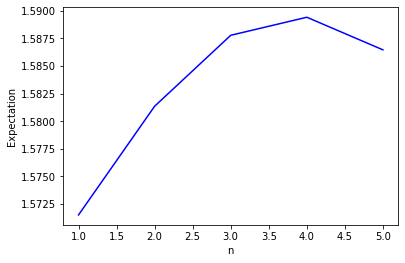

In [201]:
test_scheme_for_all_n(S_V_process,function_for_scheme,n=5)

# Integrated variance formulation (integrated-rough Heston model)
_Scheme (7)_

In [267]:
def S_X_process(n):
    
    t_delta = T/n
    t = [k*t_delta for k in range(n+1)]
    
    Y_n = np.zeros(n+1)
    X_n = np.zeros(n+1)
    X_n_max = np.zeros(n+1)
    
    S_n = np.zeros(n+1)

    M_n = np.zeros(n+1)
    M_n_orth = np.zeros(n+1)

    S_n[0] = np.exp(Y_0)
        
    Z = np.random.normal(0,1,n+1)
    Z_orth = np.random.normal(0,1,n+1)
    
    for k in range(n+1):
        X_n_max[k] = np.max(X_n)
        #print(X_n_max[k])
        for i in range(1,k+1):
            #print(i)
            M_n[k] += np.sqrt(X_n_max[i] - X_n_max[i-1])*Z[i]
            M_n_orth[k] += np.sqrt(X_n_max[i] - X_n_max[i-1])*Z_orth[i]

        #print(M_n)
        #print(M_n_orth)
        Y_n[k] = Y_0 - 0.5*X_n_max[k] + rho*M_n[k] + np.sqrt(1 - rho**2)*M_n_orth[k]

        X_sum = 0
        for i in range(k):
            #print(K_integral, K_t(t[k] - t[i])*theta*t[i]*(t[i+1]-t[i]))
            X_sum += (-l*X_n_max[i] + nu*M_n[i])*(t[i+1]-t[i])
            #X_sum += K_t(t[k] - t[i])*(theta*t[i] - l*X_n_max[i] + nu*M_n[i])*(t[i+1]-t[i])

        K_integral = integrate.quad(lambda s: theta*K_t(t[k]-s)*s,0,t[k])[0]
        X_sum += K_integral

        X_n[k] = V_0*t[k] + X_sum
        
        S_n[k] = np.exp(Y_n[k])
    
    #print()
    return {"S_n": S_n,
            "X_n": X_n}
    #return (S_n, X_n) #X_n is not correct

### Test

In [268]:
s = test_scheme_for_fixed_n(S_X_process,function_for_scheme,n=4)
print(np.mean(s))

KeyError: 1

In [269]:
test_scheme_for_all_n(S_X_process,function_for_scheme,n=5)

KeyError: 1

## Main algorithm

In [270]:
def scheme_8(f, result):
    return main(S_V_process, f, result)

In [271]:
def scheme_8_X(f):
    U_M_n = np.zeros(n)
    errors = np.zeros(n)

    X_M_n = np.zeros(n)
    
    U_M_table = []
    errors_table = []
    time_table = []

    for i in range(n):
        t_0 = time()

        V_n_M = np.zeros(M)
        X_T_M = np.zeros(M)

        for m in range(M):
            V_n_m = S_V_process(i+1)["V_n"]
            V_n_M[m] = V_n_m[-1]
            #print(V_n_m)
            X_T_M[m] = sum(V_n_m[k]*T/i for k in range(i))
            
        f_X = f(X_T_M)
        
        U_M = np.mean(f_X)
        U_M_n[i] = U_M

        var_M = np.var(f_X)

        error = 2*var_M/np.sqrt(M)
        errors[i] = error

        confidence_interval = [U_M - error, U_M + error]

        t_1 = time()

        if i in n_check_array:
            U_M_table.append(U_M)
            errors_table.append(error)
            time_table.append(t_1 - t_0)

    integers1toN = np.arange(1,n+1)
    cum_sum_n = np.cumsum(U_M_n)/integers1toN

    return {"U_M_table": U_M_table, 
            "errors_table": errors_table, 
            "time_table": time_table,
            "cum_sum_n": cum_sum_n,
            "errors": errors}

In [272]:
def scheme_9(f, result):
    return main(S_X_process, f, result)

In [273]:
def main(process,f,result=""):
    U_M_n = np.zeros(n)
    errors = np.zeros(n)

    U_M_table = []
    errors_table = []
    time_table = []

    for i in range(n):
        t_0 = time()

        X_n_M = np.zeros(M)

        for m in range(M):
            X_n_m = process(i+1)[result]
            X_n_M[m] = X_n_m[-1]
            #print(X_n_m[-1])
            #print()

        U_M = np.mean(f(X_n_M))
        U_M_n[i] = U_M

        var_M = np.var(f(X_n_M))

        error = 2*var_M/np.sqrt(M)
        errors[i] = error

        confidence_interval = [U_M - error, U_M + error]

        t_1 = time()

        if i in n_check_array:
            U_M_table.append(U_M)
            errors_table.append(error)
            time_table.append(t_1 - t_0)

    integers1toN = np.arange(1,n+1)
    cum_sum_n = np.cumsum(U_M_n)/integers1toN

    return {"U_M_table": U_M_table, 
            "errors_table": errors_table, 
            "time_table": time_table,
            "cum_sum_n": cum_sum_n,
            "errors": errors}

### Auxilary functions for displaying the results

In [274]:
def plot_estimations(scheme_8_data, scheme_9_data, title="E[f(S,X)]", ref_value=None):
    integers1toN = np.arange(1,n+1)
    
    fig, ax = plt.subplots()
    
    ax.plot(integers1toN, scheme_8_data['cum_sum_n'], label='Scheme (8)', color="blue")
    ax.fill_between(integers1toN, scheme_8_data['cum_sum_n'] - scheme_8_data['errors'], 
                    scheme_8_data['cum_sum_n'] + scheme_8_data['errors'], label='Confidence interval', 
                    color='blue', alpha=.1)
    
    ax.plot(integers1toN, scheme_9_data['cum_sum_n'], label='Scheme (9)', color="orange")
    ax.fill_between(integers1toN, scheme_9_data['cum_sum_n'] - scheme_9_data['errors'], 
                    scheme_9_data['cum_sum_n'] + scheme_9_data['errors'], label='Confidence interval', 
                    color='orange', alpha=.1)

    if ref_value is not None:
        ax.axhline(ref_value, label='reference value', color="green", linestyle='--')
    
    ax.legend(loc=1)
    
    plt.title(f"Estimation of {title}")
    plt.xlabel("Number of steps")
    plt.ylabel("Estimation")
    
    plt.show()

In [275]:
def show_numerical_results_table(scheme_8_results, scheme_9_results, ref_value):
    #TODO init constants
    table_size = np.size(scheme_8_results["U_M_table"])
    
    print("\tEstimation of E[X_T] with Scheme (8) (left) and Scheme (9) (right).")
    print()
    print("\tMean Value\t Stat.Error\t Comp.Time\t||\t Mean Value\t Stat.Error\t Comp.Time")
    print(f"Ref\t {ref_value}")
    for k in range(table_size):
        print(f"n={n_check_array[k]}\t",
        f"{scheme_8_results['U_M_table'][k]:f}\t",
        f"{scheme_8_results['errors_table'][k]:f}\t",
        f"{scheme_8_results['time_table'][k]:f}\t||\t",
        f"{scheme_9_results['U_M_table'][k]:f}\t",
        f"{scheme_9_results['errors_table'][k]:f}\t",
        f"{scheme_9_results['time_table'][k]:f}")


# Numerical results

In [276]:
n = 10

## _European call_ maximum(S_T-K,0)

In [277]:
scheme_8_results = scheme_8(european_call_options, "S_n")
scheme_9_results = scheme_9(european_call_options, "S_n")

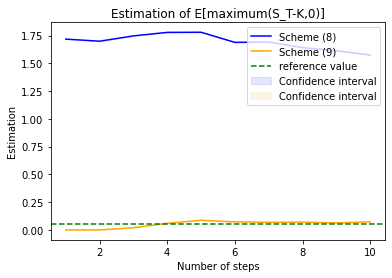

	Estimation of E[X_T] with Scheme (8) (left) and Scheme (9) (right).

	Mean Value	 Stat.Error	 Comp.Time	||	 Mean Value	 Stat.Error	 Comp.Time
Ref	 0.056832
n=4	 1.784750	 0.000000	 0.001379	||	 0.197231	 0.000000	 0.002990
n=6	 1.711298	 0.000000	 0.002252	||	 0.045828	 0.000000	 0.003632
n=8	 1.395038	 0.000000	 0.002694	||	 0.000000	 0.000000	 0.005297


In [278]:
plot_estimations(scheme_8_results, scheme_9_results, "E[maximum(S_T-K,0)]", european_call_ref)
show_numerical_results_table(scheme_8_results, scheme_9_results, european_call_ref)

## _Asian option_ maximum(A_T-K,0)

In [395]:
scheme_8_results = scheme_8(asian_options, "S_n")
scheme_9_results = scheme_9(asian_options, "S_n")

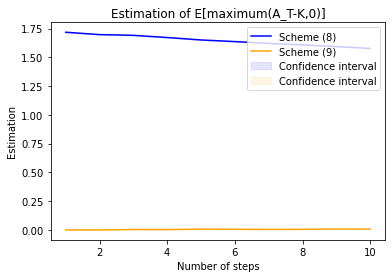

	Estimation of E[X_T] with Scheme (8) (left) and Scheme (9) (right).

	Mean Value	 Stat.Error	 Comp.Time	||	 Mean Value	 Stat.Error	 Comp.Time
Ref	 -
n=4	 1.566145	 0.000000	 0.026864	||	 0.020518	 0.000000	 0.011647
n=6	 1.526086	 0.000000	 0.043512	||	 0.000000	 0.000000	 0.017951
n=8	 1.479097	 0.000000	 0.067770	||	 0.028728	 0.000000	 0.025985


In [396]:
plot_estimations(scheme_8_results, scheme_9_results, "E[maximum(A_T-K,0)]")
show_numerical_results_table(scheme_8_results, scheme_9_results, "-")

## _Lookback option_ maximum(M_T-K,0)

In [175]:
scheme_8_results = scheme_8(lookback_options, "S_n")
scheme_9_results = scheme_9(lookback_options, "S_n")

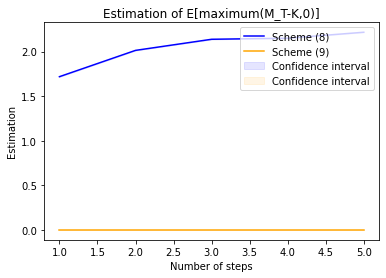

	Estimation of E[X_T] with Scheme (8) (left) and Scheme (9) (right). The computation time is in seconds.

	Mean Value	 Stat.Error	 Comp.Time	||	 Mean Value	 Stat.Error	 Comp.Time
Ref	 -
n=2	 2.386904	 0.000000	 0.019964	||	 0.000000	 0.000000	 0.006571
n=4	 2.483802	 0.000000	 0.026723	||	 0.000000	 0.000000	 0.011996


In [176]:
plot_estimations(scheme_8_results, scheme_9_results, "E[maximum(M_T-K,0)]")
show_numerical_results_table(scheme_8_results, scheme_9_results, "-")

## _Variance swap price_ E[X_t]

In [412]:
n=10

scheme_8_results = scheme_8_X(variance_swap_price)
scheme_9_results = scheme_9(variance_swap_price, "X_n")

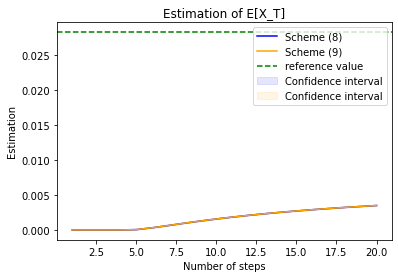

	Estimation of E[X_T] with Scheme (8) (left) and Scheme (9) (right).

	Mean Value	 Stat.Error	 Comp.Time	||	 Mean Value	 Stat.Error	 Comp.Time
Ref	 0.028295
n=4	 0.000231	 0.000000	 0.027444	||	 0.011418	 0.000026	 0.158040
n=6	 0.002573	 0.000000	 0.043744	||	 0.015309	 0.000049	 0.216451
n=8	 0.003788	 0.000000	 0.068099	||	 0.013053	 0.000054	 0.280752
n=10	 0.004539	 0.000000	 0.099647	||	 0.012740	 0.000038	 0.345835
n=12	 0.005054	 0.000000	 0.134705	||	 0.013645	 0.000060	 0.419293
n=14	 0.005430	 0.000000	 0.176174	||	 0.013263	 0.000062	 0.480284
n=16	 0.005719	 0.000000	 0.221301	||	 0.014052	 0.000088	 0.551789
n=18	 0.005948	 0.000000	 0.273214	||	 0.013055	 0.000065	 0.616193


In [418]:
plot_estimations(scheme_8_results, scheme_8_results, "E[X_T]", variance_swap_price_ref)
show_numerical_results_table(scheme_8_results, scheme_9_results, variance_swap_price_ref)

## _Variance call price_ E[maximum(X_T-V_0,0)]

In [416]:
n=20
scheme_8_results = scheme_8_X(variance_call_price)
scheme_9_results = scheme_9(variance_call_price, "X_n")

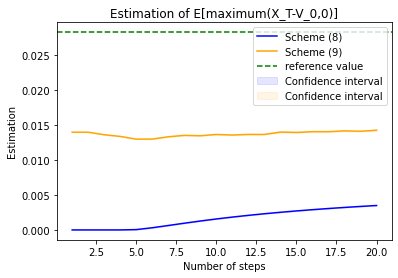

	Estimation of E[X_T] with Scheme (8) (left) and Scheme (9) (right).

	Mean Value	 Stat.Error	 Comp.Time	||	 Mean Value	 Stat.Error	 Comp.Time
Ref	 0.013517
n=4	 0.000231	 0.000000	 0.027444	||	 0.011418	 0.000026	 0.158040
n=6	 0.002573	 0.000000	 0.043744	||	 0.015309	 0.000049	 0.216451
n=8	 0.003788	 0.000000	 0.068099	||	 0.013053	 0.000054	 0.280752
n=10	 0.004539	 0.000000	 0.099647	||	 0.012740	 0.000038	 0.345835
n=12	 0.005054	 0.000000	 0.134705	||	 0.013645	 0.000060	 0.419293
n=14	 0.005430	 0.000000	 0.176174	||	 0.013263	 0.000062	 0.480284
n=16	 0.005719	 0.000000	 0.221301	||	 0.014052	 0.000088	 0.551789
n=18	 0.005948	 0.000000	 0.273214	||	 0.013055	 0.000065	 0.616193


In [417]:
plot_estimations(scheme_8_results, scheme_9_results, "E[maximum(X_T-V_0,0)]", variance_swap_price_ref)
show_numerical_results_table(scheme_8_results, scheme_9_results, variance_call_price_ref)